<a href="https://colab.research.google.com/github/ritam-sarkar/Algorithm/blob/master/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Feature scaling

### Standardization

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
254,15724161,Female,50,44000,0
232,15813113,Male,40,107000,1
30,15581198,Male,31,74000,0
310,15717893,Female,42,70000,0
110,15665416,Female,39,71000,0


In [25]:

from sklearn.model_selection import train_test_split

X = df[['Age','EstimatedSalary']]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


use standardscalar

In [28]:
from  sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)
print(scalar.mean_)
print(type(X_train_scaled))

[3.81266667e+01 6.95833333e+04]
<class 'numpy.ndarray'>


convert scaled data to dataframe

In [30]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train.describe())
print(X_train_scaled.describe())

              Age  EstimatedSalary
count  300.000000       300.000000
mean    38.126667     69583.333333
std     10.114592     34548.541619
min     18.000000     15000.000000
25%     30.750000     43000.000000
50%     38.000000     69500.000000
75%     46.000000     88000.000000
max     60.000000    150000.000000
                Age  EstimatedSalary
count  3.000000e+02     3.000000e+02
mean   1.539509e-16     1.421085e-16
std    1.001671e+00     1.001671e+00
min   -1.993189e+00    -1.582542e+00
25%   -7.305279e-01    -7.707344e-01
50%   -1.254409e-02    -2.416095e-03
75%    7.797139e-01     5.339571e-01
max    2.166165e+00     2.331532e+00


Here after svaling mean shoould be 0 and sd should be 1 , but because of some impurity in the data its coming as close to 0 and 1

Scatter plot for X_train and x_train_scaled

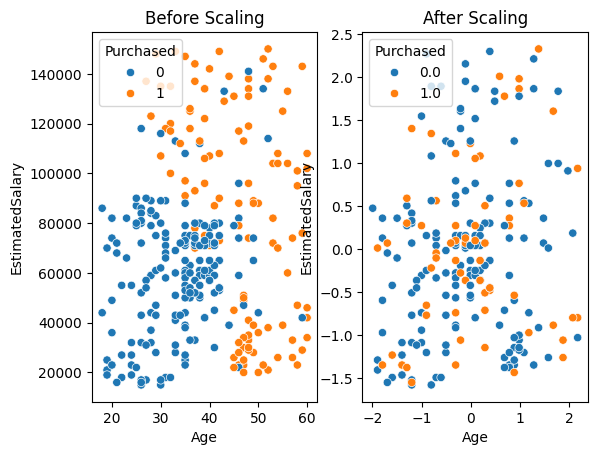

In [41]:
# Scatter plot for X_train and x_train_scaled
plt.subplot(1,2,1)
sns.scatterplot(x=X_train['Age'], y=X_train['EstimatedSalary'], hue=y_train)
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.scatterplot(x=X_train_scaled['Age'], y=X_train_scaled['EstimatedSalary'], hue=y_train)
plt.title('After Scaling')

plt.show()


distribution for age and salary for not scaled and scaled data

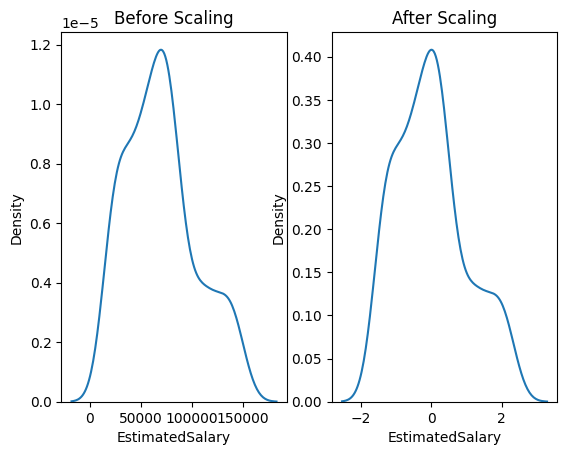

In [44]:
plt.subplot(1,2,1)
sns.kdeplot(x=X_train['EstimatedSalary'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.kdeplot(x=X_train_scaled['EstimatedSalary'])
plt.title('After Scaling')

plt.show()

You can see the shape of the distribution is same but range is different , after scaling it is readable and the data lies between -2 to +2 with mean = 0


# Feature Transformation
### Ordinal encoding

In [51]:
df = pd.read_csv('customer.csv')
df.sample(5)

,age,gender,review,education,purchased
17,22,Female,Poor,UG,Yes
27,69,Female,Poor,PG,No
9,74,Male,Good,UG,Yes
26,53,Female,Poor,PG,No
38,45,Female,Good,School,No


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:4], df.iloc[:,-1], test_size=0.25, random_state=0)
X_train.sample(5)

,age,gender,review,education
23,96,Female,Good,School
19,97,Male,Poor,PG
37,94,Male,Average,PG
45,61,Male,Poor,PG
32,92,Male,Average,UG


In [56]:
print(df['review'].unique())
print(df['education'].unique())

['Average' 'Poor' 'Good']
['School' 'UG' 'PG']


In [57]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
oe.fit(X_train[['review','education']])
X_train[['review','education']] = oe.transform(X_train[['review','education']])
X_train.sample(10)

,age,gender,review,education
12,51,Male,0.0,0.0
19,97,Male,0.0,2.0
39,76,Male,0.0,2.0
1,68,Female,0.0,1.0
5,31,Female,1.0,0.0
36,34,Female,2.0,1.0
13,57,Female,1.0,0.0
7,60,Female,0.0,0.0
6,18,Male,2.0,0.0
45,61,Male,0.0,2.0


In [58]:
print(X_train['review'].unique())
print(X_train['education'].unique())

[1. 2. 0.]
[0. 2. 1.]


#### Label encoder for y_train
It is recomended that lableencoder is only used for target column from class 0 to n-1

In [64]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_train


array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0])

# Nominal encoding
### One hot encoding

In [80]:

# Load the 'mpg' dataset
mpg = sns.load_dataset('mpg')

# Display the first few rows of the dataset
print(mpg.head())
print(mpg['origin'].unique())


    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
['usa' 'japan' 'europe']


In [81]:
# prompt: one hot encoding using sckitlearn on origin column

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
enc = OneHotEncoder(drop='first')

# Fit the encoder on the 'origin' column
enc.fit(mpg[['origin']])

# Transform the 'origin' column into one-hot encoded features
one_hot_encoded = enc.transform(mpg[['origin']]).toarray()

# Create a new DataFrame with the one-hot encoded features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=enc.get_feature_names_out(['origin']))

# Concatenate the one-hot encoded features with the original DataFrame
mpg.drop('origin',axis=1,inplace=True)
mpg = pd.concat([mpg, one_hot_df], axis=1)

# Display the first few rows of the updated DataFrame
mpg.sample(5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_japan,origin_usa
329,44.6,4,91.0,67.0,1850,13.8,80,honda civic 1500 gl,1.0,0.0
208,13.0,8,318.0,150.0,3940,13.2,76,plymouth volare premier v8,0.0,1.0
151,31.0,4,79.0,67.0,2000,16.0,74,fiat x1.9,0.0,0.0
276,21.6,4,121.0,115.0,2795,15.7,78,saab 99gle,0.0,0.0
202,17.5,6,258.0,95.0,3193,17.8,76,amc pacer d/l,0.0,1.0


### Column Transformer
When we have to transform multiple column with multiple encoder or imputer , we need this column transformer

In [82]:
covid=pd.read_csv('covid_toy.csv')
covid.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [86]:
covid['fever'].unique()

array([103., 100., 101.,  98.,  nan,  99., 102., 104.])

In [85]:
# Define features (X) and target (y) - adjust column names as needed
X = covid.drop('has_covid', axis=1)
y = covid['has_covid']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', SimpleImputer(strategy='mean'), ['fever']),  # Impute 'fever' with mean
        ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']), # Encode 'cough'
        ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender']) # Encode 'gender'
    ], remainder='passthrough' # Keep remaining columns unchanged
)

# Fit and transform the training data
X_train_transformed = transformer.fit_transform(X_train)

# Transform the testing data (using the fitted transformer)
X_test_transformed = transformer.transform(X_test)

# Create DataFrames from the transformed arrays (optional, but helpful for analysis)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=transformer.get_feature_names_out())
X_test_transformed = pd.DataFrame(X_test_transformed, columns=transformer.get_feature_names_out())

X_train_transformed.head()


,tnf1__fever,tnf2__cough,tnf3__gender_Male,remainder__age,remainder__city
0,101.0,0.0,0.0,81,Mumbai
1,100.0,0.0,0.0,5,Kolkata
2,100.0,0.0,0.0,19,Kolkata
3,100.0,0.0,1.0,27,Delhi
4,103.0,0.0,0.0,73,Delhi


The problem is if I want to apply one transformer in column1 and then second transformer on the same column

In columntransformer all transformers are applied parallely , we can't control the sequence
Suppose I want to apply imputer , then clean duplicate then encoding , its not allowed here for that we need pipeline